In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata.shape

(12208178, 13)

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,Banks,MARKET STREET,FLINDERS LANE,FLINDERS STREET,5,1263W,01/10/2011 12:01:10 AM,01/10/2011 12:02:44 AM,94,2P DIS M-SUN 0:00-23:59,0,957,1667
1,Chinatown,RUSSELL STREET,BOURKE STREET,Lt COLLINS STREET,2,742E,01/10/2011 12:01:11 AM,01/10/2011 03:58:20 AM,14229,4P DIS AOT 12:00-7:30,0,1221,525
2,Courtney,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,01/10/2011 12:01:11 AM,01/10/2011 11:00:19 AM,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
3,Princes Theatre,EXHIBITION STREET,Lt BOURKE STREET,BOURKE STREET,2,452E,01/10/2011 12:01:13 AM,01/10/2011 12:37:42 AM,2189,2P DIS M-SUN 0:00-23:59,0,647,201
4,Princes Theatre,EXHIBITION STREET,BOURKE STREET,Lt COLLINS STREET,5,429W,01/10/2011 12:01:14 AM,01/10/2011 05:28:10 AM,19616,TKT AREA M-SUN 0:00 - 7:30,0,647,176


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
12208173,Chinatown,RUSSELL STREET,Lt BOURKE STREET,BOURKE STREET,2,770E,30/09/2012 11:47:56 PM,30/09/2012 11:57:52 PM,596,2P DIS M-SUN 0:00-23:59,0,1221,7815
12208174,Chinatown,RUSSELL STREET,BOURKE STREET,Lt COLLINS STREET,5,765W,30/09/2012 11:48:34 PM,30/09/2012 11:50:02 PM,88,2P DIS M-SUN 0:00-23:59,0,1221,689
12208175,City Square,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1777S,30/09/2012 11:48:41 PM,30/09/2012 11:51:57 PM,196,2P DIS M-SUN 0:00-23:59,0,669,6758
12208176,City Square,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1775S,30/09/2012 11:49:43 PM,30/09/2012 11:52:54 PM,191,2P DIS M-SUN 0:00-23:59,0,669,1407
12208177,Princes Theatre,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,4,2843S,30/09/2012 11:52:29 PM,30/09/2012 11:59:00 PM,391,2P DIS AOT 0:00-23:59,0,894,6954


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1251600
Princes Theatre     904186
Victoria Market     845505
Regency             774955
Southbank           772985
The Mac             748260
Hyatt               718992
Titles              684197
Rialto              544591
City Square         527002
County              518606
Hardware            499803
Chinatown           482723
Courtney            473033
Magistrates         456578
Banks               446577
Spencer             444369
RACV                395147
Jolimont            353732
Supreme             235165
Tavistock            64306
Docklands            62753
West Melbourne        3113
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,BANKS,MARKET STREET,FLINDERS LANE,FLINDERS STREET,5,1263W,01/10/2011 12:01:10 AM,01/10/2011 12:02:44 AM,94,2P DIS M-SUN 0:00-23:59,0,957,1667
1,CHINATOWN,RUSSELL STREET,BOURKE STREET,LT COLLINS STREET,2,742E,01/10/2011 12:01:11 AM,01/10/2011 03:58:20 AM,14229,4P DIS AOT 12:00-7:30,0,1221,525
2,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,01/10/2011 12:01:11 AM,01/10/2011 11:00:19 AM,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
3,PRINCES THEATRE,EXHIBITION STREET,LT BOURKE STREET,BOURKE STREET,2,452E,01/10/2011 12:01:13 AM,01/10/2011 12:37:42 AM,2189,2P DIS M-SUN 0:00-23:59,0,647,201
4,PRINCES THEATRE,EXHIBITION STREET,BOURKE STREET,LT COLLINS STREET,5,429W,01/10/2011 12:01:14 AM,01/10/2011 05:28:10 AM,19616,TKT AREA M-SUN 0:00 - 7:30,0,647,176


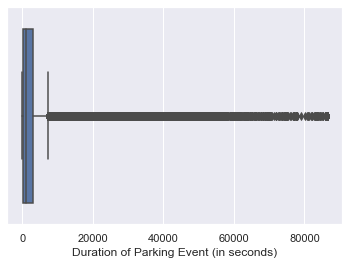

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             1170701
QUEEN STREET                 919635
LA TROBE STREET              711087
EXHIBITION STREET            698729
FRANKLIN STREET              654323
COLLINS STREET               647132
ELIZABETH STREET             613469
RUSSELL STREET               577396
BOURKE STREET                517495
LT LONSDALE STREET           423729
LT COLLINS STREET            348809
FLINDERS LANE                331505
SPRING STREET                330752
KING STREET                  319001
ERROL STREET                 283772
WILLIAM STREET               248484
LT BOURKE STREET             219680
COVENTRY STREET              207415
A'BECKETT STREET             187942
VICTORIA STREET              176841
FLINDERS STREET              161533
SPENCER STREET               159248
QUEENSBERRY STREET           144009
CAPEL STREET                 134440
ALBERT STREET                117240
THERRY STREET                114355
GRANT STREET                 109481
DORCAS STREET               

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            1092126
QUEEN STREET            994427
WILLIAM STREET          788501
QUEENSBERRY STREET      777738
RUSSELL STREET          669756
SPENCER STREET          590755
SWANSTON STREET         578673
EXHIBITION STREET       560815
LT LONSDALE STREET      522588
LONSDALE STREET         446584
LT COLLINS STREET       433952
VICTORIA STREET         389997
BOURKE STREET           351575
COLLINS STREET          345125
ELIZABETH STREET        307663
LT BOURKE STREET        303134
FLINDERS LANE           250787
LA TROBE STREET         211338
WILLAM STREET           179089
THERRY STREET           172820
FRANKLIN STREET         162448
A'BECKETT STREET        159214
WELLS STREET            151318
DODDS STREET            126450
STURT STREET            112675
FLINDERS STREET         110245
SOUTHBANK BOULEVARD     107872
O'CONNELL STREET        104972
ERROL STREET            104254
KINGS WAY                99103
HOWARD STREET            73206
PELHAM STREET            70120
BALSTON 

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET         1054440
ELIZABETH STREET       1022481
VICTORIA STREET         995084
QUEEN STREET            952430
EXHIBITION STREET       656965
KING STREET             590755
SPRING STREET           562633
LONSDALE STREET         550299
RUSSELL STREET          484149
FLINDERS LANE           455370
LT BOURKE STREET        446584
COLLINS STREET          433952
LT COLLINS STREET       351575
SWANSTON STREET         307663
LA TROBE STREET         305703
BOURKE STREET           303134
FLINDERS STREET         250787
LT LONSDALE STREET      248672
DODDS STREET            180344
FRANKLIN STREET         172820
ST KILDA ROAD           151318
LANSDOWNE STREET        113303
QUEENSBERRY STREET      109616
LEVESON STREET          104254
POWER STREET             97115
A'BECKETT STREET         92632
WELLS STREET             89301
THERRY STREET            81256
WALSH STREET             76459
HAWKE STREET             66209
CAPEL STREET             65198
STURT STREET             60011
MILES ST

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,BANKS,MARKET STREET,FLINDERS LANE,FLINDERS STREET,5,1263W,2011-01-10 00:01:10,2011-01-10 00:02:44,94,2P DIS M-SUN 0:00-23:59,0,957,1667
1,CHINATOWN,RUSSELL STREET,BOURKE STREET,LT COLLINS STREET,2,742E,2011-01-10 00:01:11,2011-01-10 03:58:20,14229,4P DIS AOT 12:00-7:30,0,1221,525
2,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,2011-01-10 00:01:11,2011-01-10 11:00:19,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
3,PRINCES THEATRE,EXHIBITION STREET,LT BOURKE STREET,BOURKE STREET,2,452E,2011-01-10 00:01:13,2011-01-10 00:37:42,2189,2P DIS M-SUN 0:00-23:59,0,647,201
4,PRINCES THEATRE,EXHIBITION STREET,BOURKE STREET,LT COLLINS STREET,5,429W,2011-01-10 00:01:14,2011-01-10 05:28:10,19616,TKT AREA M-SUN 0:00 - 7:30,0,647,176


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
12208173,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-09-30 23:47:56,2012-09-30 23:57:52,596,2P DIS M-SUN 0:00-23:59,0,1221,7815
12208174,CHINATOWN,RUSSELL STREET,BOURKE STREET,LT COLLINS STREET,5,765W,2012-09-30 23:48:34,2012-09-30 23:50:02,88,2P DIS M-SUN 0:00-23:59,0,1221,689
12208175,CITY SQUARE,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1777S,2012-09-30 23:48:41,2012-09-30 23:51:57,196,2P DIS M-SUN 0:00-23:59,0,669,6758
12208176,CITY SQUARE,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1775S,2012-09-30 23:49:43,2012-09-30 23:52:54,191,2P DIS M-SUN 0:00-23:59,0,669,1407
12208177,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,4,2843S,2012-09-30 23:52:29,2012-09-30 23:59:00,391,2P DIS AOT 0:00-23:59,0,894,6954


## Data Visualisation

In [19]:
def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

### Most popular parking street in 4 hour interval

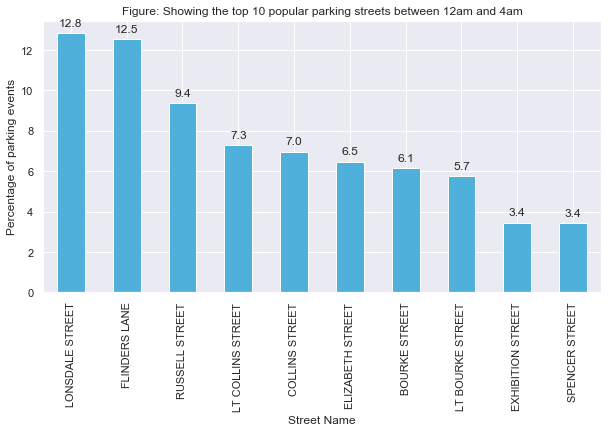

In [20]:
mask = (parkingdata['Arrival Time'].dt.hour >= 0) & (parkingdata['Arrival Time'].dt.hour <= 3)
between0and4 = parkingdata.loc[mask]
mostPopular = between0and4['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 12am and 4am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

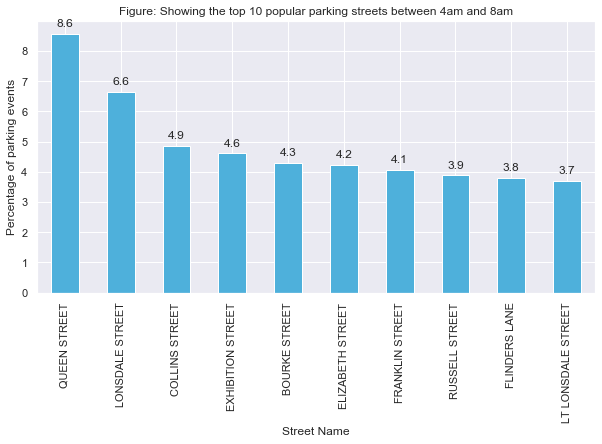

In [21]:
mask = (parkingdata['Arrival Time'].dt.hour >= 4) & (parkingdata['Arrival Time'].dt.hour <= 7)
between4and8 = parkingdata.loc[mask]
mostPopular = between4and8['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 4am and 8am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

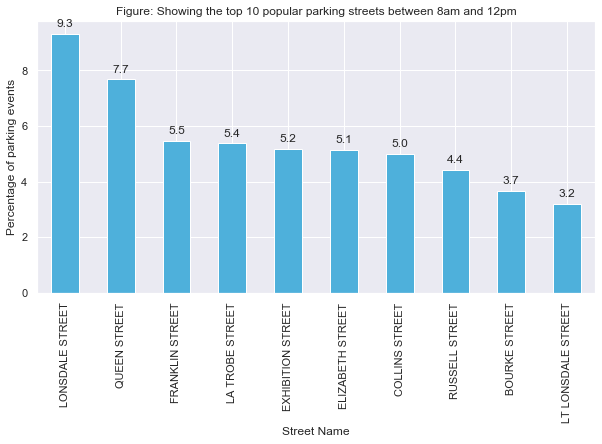

In [22]:
mask = (parkingdata['Arrival Time'].dt.hour >= 8) & (parkingdata['Arrival Time'].dt.hour <= 11)
between8and12 = parkingdata.loc[mask]
mostPopular = between8and12['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 8am and 12pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

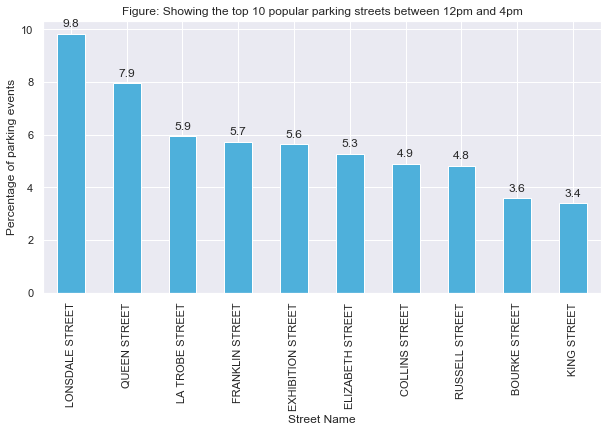

In [23]:
mask = (parkingdata['Arrival Time'].dt.hour >= 12) & (parkingdata['Arrival Time'].dt.hour <= 15)
between12and16 = parkingdata.loc[mask]
mostPopular = between12and16['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 12pm and 4pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

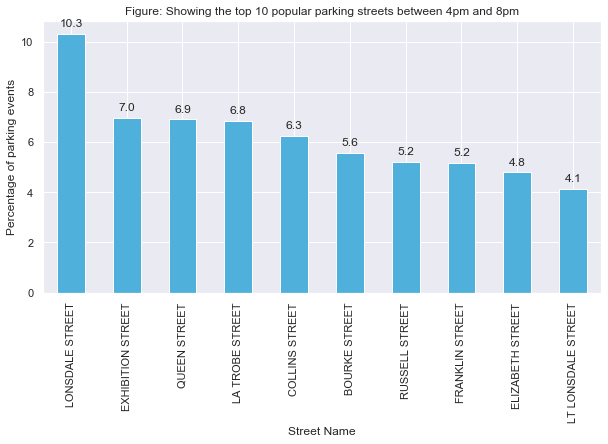

In [24]:
mask = (parkingdata['Arrival Time'].dt.hour >= 16) & (parkingdata['Arrival Time'].dt.hour <= 19)
between16and20 = parkingdata.loc[mask]
mostPopular = between16and20['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 4pm and 8pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

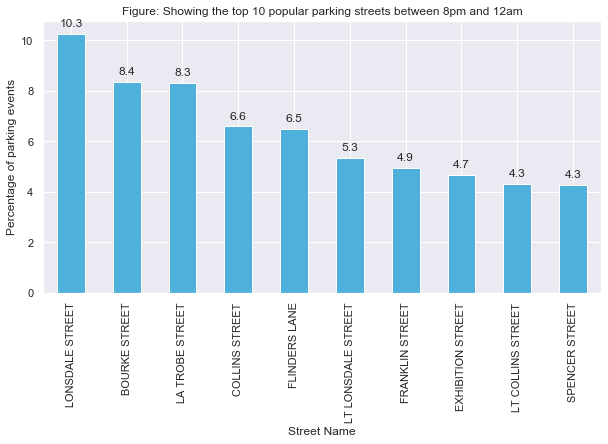

In [25]:
mask = (parkingdata['Arrival Time'].dt.hour >= 20) & (parkingdata['Arrival Time'].dt.hour <= 23)
between20and00 = parkingdata.loc[mask]
mostPopular = between20and00['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 8pm and 12am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

### Most popular parking area in 4 hour interval

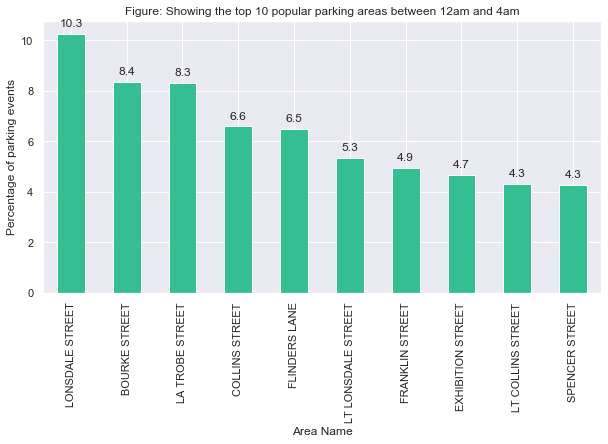

In [26]:
mask = (parkingdata['Arrival Time'].dt.hour >= 0) & (parkingdata['Arrival Time'].dt.hour <= 3)
between0and4 = parkingdata.loc[mask]
mostPopular = between0and4['Area Name'].value_counts(normalize=True)*100
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 12am and 4am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

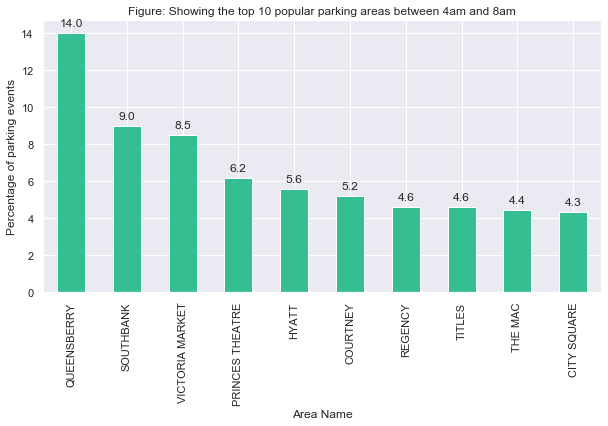

In [27]:
mask = (parkingdata['Arrival Time'].dt.hour >= 4) & (parkingdata['Arrival Time'].dt.hour <= 7)
between4and8 = parkingdata.loc[mask]
mostPopular = between4and8['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 4am and 8am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

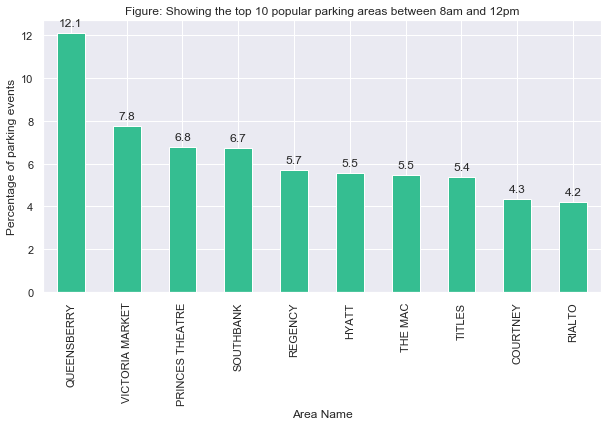

In [28]:
mask = (parkingdata['Arrival Time'].dt.hour >= 8) & (parkingdata['Arrival Time'].dt.hour <= 11)
between8and12 = parkingdata.loc[mask]
mostPopular = between8and12['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 8am and 12pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

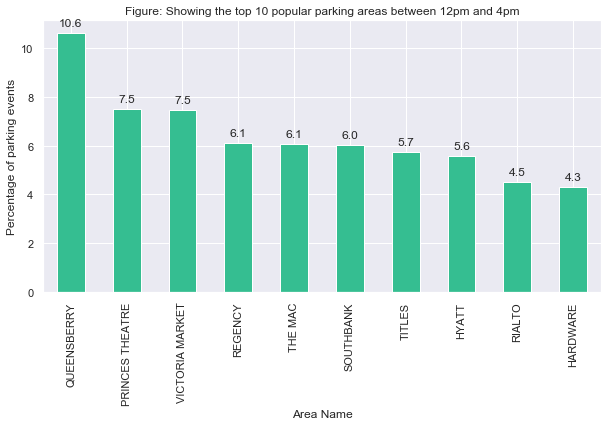

In [29]:
mask = (parkingdata['Arrival Time'].dt.hour >= 12) & (parkingdata['Arrival Time'].dt.hour <= 15)
between12and16 = parkingdata.loc[mask]
mostPopular = between12and16['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 12pm and 4pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

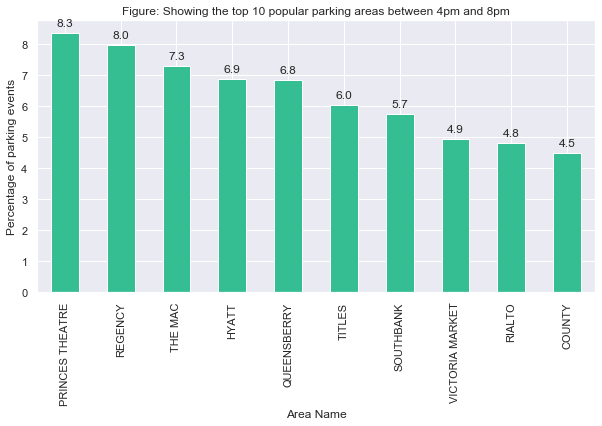

In [30]:
mask = (parkingdata['Arrival Time'].dt.hour >= 16) & (parkingdata['Arrival Time'].dt.hour <= 19)
between16and20 = parkingdata.loc[mask]
mostPopular = between16and20['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 4pm and 8pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

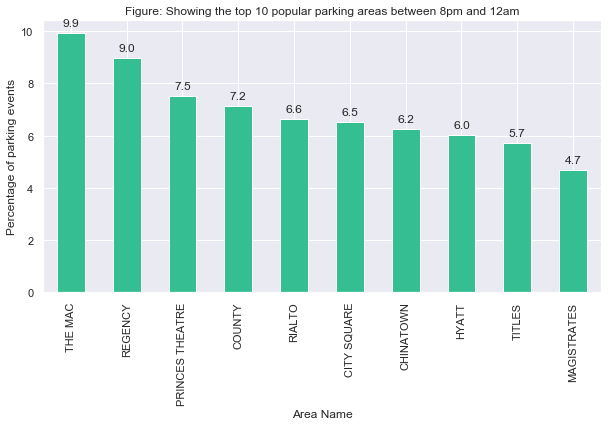

In [31]:
mask = (parkingdata['Arrival Time'].dt.hour >= 20) & (parkingdata['Arrival Time'].dt.hour <= 23)
between20and00 = parkingdata.loc[mask]
mostPopular = between20and00['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar',color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 8pm and 12am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

### Frequency of violation by month (2011)

In [32]:
#Selecting only the rows which have infringement
onlyInfringe = parkingdata.loc[parkingdata['In Violation?'] == 1, :]
onlyInfringe.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
2,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,2011-01-10 00:01:11,2011-01-10 11:00:19,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
12,RACV,BOURKE STREET,WILLIAM STREET,QUEEN STREET,4,2417S,2011-01-10 00:01:17,2011-01-10 07:24:42,26605,2P DIS M-SUN 0:00-23:59,1,123,1338
13,CHINATOWN,ELIZABETH STREET,LT BOURKE STREET,BOURKE STREET,2,946E,2011-01-10 00:01:18,2011-01-10 06:13:22,22324,P/ (NO PARKING) AOT M-SUN 12:00-7:30,1,627,565
19,HYATT,SPRING STREET,FLINDERS LANE,FLINDERS STREET,2,2E,2011-01-10 00:01:20,2011-01-10 23:59:00,86260,2P DIS M-SUN 0:00-23:59,1,1288,7
21,THE MAC,ELIZABETH STREET,LA TROBE STREET,LT LONSDALE STREET,2,972E,2011-01-10 00:01:21,2011-01-10 00:27:44,1583,1/4P M-SUN 0:00-23:59,1,627,596
24,MAGISTRATES,LT LONSDALE STREET,SPENCER STREET,KING STREET,3,3578N,2011-01-10 00:01:22,2011-01-10 23:59:00,86258,4P DIS ONLY M-SUN,1,926,1559
26,THE MAC,A'BECKETT STREET,ELIZABETH STREET,SWANSTON STREET,4,5975S,2011-01-10 00:01:23,2011-01-10 14:20:45,51562,4P DIS ONLY M-SUN,1,5,2455
27,PRINCES THEATRE,BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2381S,2011-01-10 00:01:24,2011-01-10 03:36:42,12918,P10 M-SUN 0:00-23:59,1,123,1401
29,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,1,C3150,2011-01-10 00:01:24,2011-01-10 00:02:37,73,S/ NO STOP AUTH VEH M-SUN 00:00-23:59,1,894,2038
30,CITY SQUARE,RUSSELL STREET,COLLINS STREET,FLINDERS LANE,1,C650,2011-01-10 00:01:24,2011-01-10 00:03:07,103,S/ NO STOP AOT 0:00-7:30,1,1221,479


In [33]:
#Separating the month number from the Departure Time column for further analysis
onlyInfringe['Month Number'] = onlyInfringe['Departure Time'].dt.month
onlyInfringe['Month Number'].value_counts()

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


10    174741
3     141777
7     141400
12    141058
11    140358
6     138454
5     137793
8     137302
4     130557
9     129249
2     128250
1     127567
Name: Month Number, dtype: int64

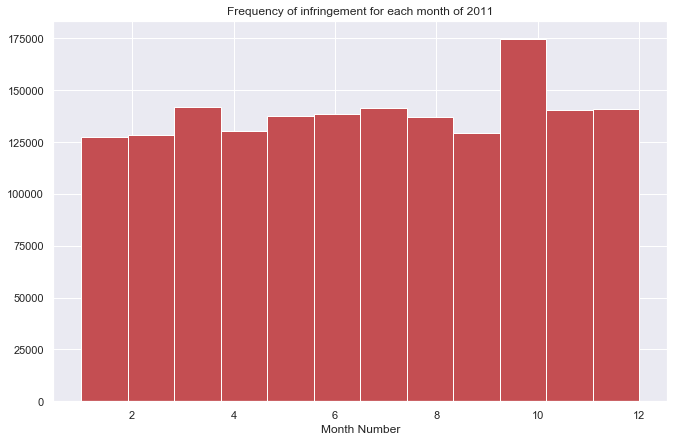

In [34]:
#Creating a histogram to show the frequency of infringement each month of the year 2011

plt.figure(figsize=(11,7))
_ = sns.distplot(onlyInfringe['Month Number'], kde = False, bins = 12, hist_kws = {"alpha": 1}, color = 'r')
_ = plt.title("Frequency of infringement for each month of 2011")

### Categories of P Type Parking Violations

In [35]:
#Checking all the values of Sign feature
onlyInfringe['Sign'].value_counts()

1P MTR M-SAT 7:30-19:30                   411584
1/2P MTR M-SAT 7:30-19:30                 133125
2P MTR M-SAT 7:30-20:30                    92177
1P SUN 7:30-18:30                          72707
1/2P M-SAT 7:30-19:30                      56923
1P TKT A M-SAT 7:30-19:30                  40724
1P TKT A M-F 7:30-18:30                    36831
2P SUN 7:30-18:30                          35392
2P TKT A M-SAT 7:30-20:30                  27352
2P TKT A M-F 7:30-18:30                    26065
2P DIS M-SUN 0:00-23:59                    21594
1P TKT A RPA M-F 7:30-18:30                20828
4P MTR M-F 7:30-18:30                      17515
CW TOW M-F 16:00-18:30                     15670
1P M-F 7:30-18:30                          14570
1P MTR M-SAT 7:30-18:30                    14456
1P MTR M-SAT 6:00-19:30                    14307
1/4P M-F 7:30-18:30                        13396
1/2P TKT A M-SAT 7:30-19:30                13036
1/4P M-SAT 7:30-19:30                      12364
1P MTR M-F 7:30-16:0

In [36]:
#Creating a new dataframe containing only P based parking sign infringements
pSignInfringe = onlyInfringe.loc[onlyInfringe.Sign.str.contains("1P|1/2P|2P|4P|1/4P|P10|P/"), :]
pSignInfringe.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID,Month Number
2,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,2011-01-10 00:01:11,2011-01-10 11:00:19,39548,2P DIS M-SUN 0:00-23:59,1,627,3202,1
12,RACV,BOURKE STREET,WILLIAM STREET,QUEEN STREET,4,2417S,2011-01-10 00:01:17,2011-01-10 07:24:42,26605,2P DIS M-SUN 0:00-23:59,1,123,1338,1
13,CHINATOWN,ELIZABETH STREET,LT BOURKE STREET,BOURKE STREET,2,946E,2011-01-10 00:01:18,2011-01-10 06:13:22,22324,P/ (NO PARKING) AOT M-SUN 12:00-7:30,1,627,565,1
19,HYATT,SPRING STREET,FLINDERS LANE,FLINDERS STREET,2,2E,2011-01-10 00:01:20,2011-01-10 23:59:00,86260,2P DIS M-SUN 0:00-23:59,1,1288,7,1
21,THE MAC,ELIZABETH STREET,LA TROBE STREET,LT LONSDALE STREET,2,972E,2011-01-10 00:01:21,2011-01-10 00:27:44,1583,1/4P M-SUN 0:00-23:59,1,627,596,1
24,MAGISTRATES,LT LONSDALE STREET,SPENCER STREET,KING STREET,3,3578N,2011-01-10 00:01:22,2011-01-10 23:59:00,86258,4P DIS ONLY M-SUN,1,926,1559,1
26,THE MAC,A'BECKETT STREET,ELIZABETH STREET,SWANSTON STREET,4,5975S,2011-01-10 00:01:23,2011-01-10 14:20:45,51562,4P DIS ONLY M-SUN,1,5,2455,1
27,PRINCES THEATRE,BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2381S,2011-01-10 00:01:24,2011-01-10 03:36:42,12918,P10 M-SUN 0:00-23:59,1,123,1401,1
32,PRINCES THEATRE,LT BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2531S,2011-01-10 00:01:25,2011-01-10 02:19:48,8303,1P AOT M-SAT 0:00-7:30,1,907,1294,1
34,CITY SQUARE,FLINDERS LANE,SWANSTON STREET,RUSSELL STREET,4,1767S,2011-01-10 00:01:25,2011-01-10 01:10:28,4143,P10 M-SUN 0:00-23:59,1,669,1417,1


In [37]:
#Checking values of the Sign column of the new dataframe
pSignInfringe['Sign'].value_counts()

1P MTR M-SAT 7:30-19:30                  411584
1/2P MTR M-SAT 7:30-19:30                133125
2P MTR M-SAT 7:30-20:30                   92177
1P SUN 7:30-18:30                         72707
1/2P M-SAT 7:30-19:30                     56923
1P TKT A M-SAT 7:30-19:30                 40724
1P TKT A M-F 7:30-18:30                   36831
2P SUN 7:30-18:30                         35392
2P TKT A M-SAT 7:30-20:30                 27352
2P TKT A M-F 7:30-18:30                   26065
2P DIS M-SUN 0:00-23:59                   21594
1P TKT A RPA M-F 7:30-18:30               20828
4P MTR M-F 7:30-18:30                     17515
1P M-F 7:30-18:30                         14570
1P MTR M-SAT 7:30-18:30                   14456
1P MTR M-SAT 6:00-19:30                   14307
1/4P M-F 7:30-18:30                       13396
1/2P TKT A M-SAT 7:30-19:30               13036
1/4P M-SAT 7:30-19:30                     12364
1P MTR M-F 7:30-16:00                     12299
1P MTR M-F 7:30-18:30                   

In [38]:
#Creating a new feature based on the parking type of each P based parking sign among Meter, Ticket or Others
pSignInfringe['Parking Type'] = pSignInfringe.Sign.apply(lambda x: "Meter" if 'MTR' in x else ("Ticket" if "TKT" in x else "Others"))
pSignInfringe.head(10)

C:\Users\drago\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID,Month Number,Parking Type
2,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,2011-01-10 00:01:11,2011-01-10 11:00:19,39548,2P DIS M-SUN 0:00-23:59,1,627,3202,1,Others
12,RACV,BOURKE STREET,WILLIAM STREET,QUEEN STREET,4,2417S,2011-01-10 00:01:17,2011-01-10 07:24:42,26605,2P DIS M-SUN 0:00-23:59,1,123,1338,1,Others
13,CHINATOWN,ELIZABETH STREET,LT BOURKE STREET,BOURKE STREET,2,946E,2011-01-10 00:01:18,2011-01-10 06:13:22,22324,P/ (NO PARKING) AOT M-SUN 12:00-7:30,1,627,565,1,Others
19,HYATT,SPRING STREET,FLINDERS LANE,FLINDERS STREET,2,2E,2011-01-10 00:01:20,2011-01-10 23:59:00,86260,2P DIS M-SUN 0:00-23:59,1,1288,7,1,Others
21,THE MAC,ELIZABETH STREET,LA TROBE STREET,LT LONSDALE STREET,2,972E,2011-01-10 00:01:21,2011-01-10 00:27:44,1583,1/4P M-SUN 0:00-23:59,1,627,596,1,Others
24,MAGISTRATES,LT LONSDALE STREET,SPENCER STREET,KING STREET,3,3578N,2011-01-10 00:01:22,2011-01-10 23:59:00,86258,4P DIS ONLY M-SUN,1,926,1559,1,Others
26,THE MAC,A'BECKETT STREET,ELIZABETH STREET,SWANSTON STREET,4,5975S,2011-01-10 00:01:23,2011-01-10 14:20:45,51562,4P DIS ONLY M-SUN,1,5,2455,1,Others
27,PRINCES THEATRE,BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2381S,2011-01-10 00:01:24,2011-01-10 03:36:42,12918,P10 M-SUN 0:00-23:59,1,123,1401,1,Others
32,PRINCES THEATRE,LT BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2531S,2011-01-10 00:01:25,2011-01-10 02:19:48,8303,1P AOT M-SAT 0:00-7:30,1,907,1294,1,Others
34,CITY SQUARE,FLINDERS LANE,SWANSTON STREET,RUSSELL STREET,4,1767S,2011-01-10 00:01:25,2011-01-10 01:10:28,4143,P10 M-SUN 0:00-23:59,1,669,1417,1,Others


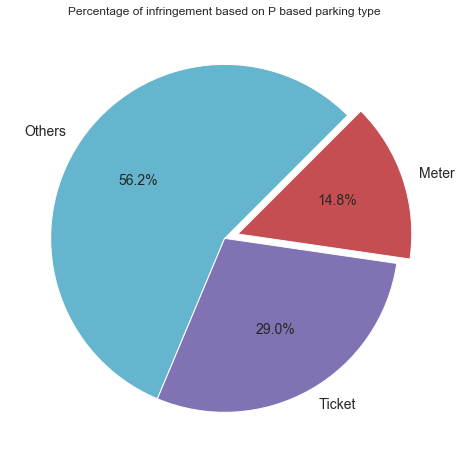

In [39]:
#Creating a pie chart based on which type of parking had more infringements

plt.figure(figsize=(10,8))
plt.pie(pSignInfringe['Parking Type'].value_counts(), labels = pSignInfringe['Parking Type'].unique(), colors = ('c', 'm', 'r'), startangle = 45, autopct = "%1.1f%%", explode = (0,0,0.08), textprops={'fontsize': 14})
plt.title("Percentage of infringement based on P based parking type")
plt.show()

### Streets with the highest amount (Perecentage) of violiations in a  given time period (every 4 Hours)

In [40]:
mostInfring = parkingdata[parkingdata['In Violation?'] == 1]
mostInfring.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
2,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,2011-01-10 00:01:11,2011-01-10 11:00:19,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
12,RACV,BOURKE STREET,WILLIAM STREET,QUEEN STREET,4,2417S,2011-01-10 00:01:17,2011-01-10 07:24:42,26605,2P DIS M-SUN 0:00-23:59,1,123,1338
13,CHINATOWN,ELIZABETH STREET,LT BOURKE STREET,BOURKE STREET,2,946E,2011-01-10 00:01:18,2011-01-10 06:13:22,22324,P/ (NO PARKING) AOT M-SUN 12:00-7:30,1,627,565
19,HYATT,SPRING STREET,FLINDERS LANE,FLINDERS STREET,2,2E,2011-01-10 00:01:20,2011-01-10 23:59:00,86260,2P DIS M-SUN 0:00-23:59,1,1288,7
21,THE MAC,ELIZABETH STREET,LA TROBE STREET,LT LONSDALE STREET,2,972E,2011-01-10 00:01:21,2011-01-10 00:27:44,1583,1/4P M-SUN 0:00-23:59,1,627,596
24,MAGISTRATES,LT LONSDALE STREET,SPENCER STREET,KING STREET,3,3578N,2011-01-10 00:01:22,2011-01-10 23:59:00,86258,4P DIS ONLY M-SUN,1,926,1559
26,THE MAC,A'BECKETT STREET,ELIZABETH STREET,SWANSTON STREET,4,5975S,2011-01-10 00:01:23,2011-01-10 14:20:45,51562,4P DIS ONLY M-SUN,1,5,2455
27,PRINCES THEATRE,BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2381S,2011-01-10 00:01:24,2011-01-10 03:36:42,12918,P10 M-SUN 0:00-23:59,1,123,1401
29,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,1,C3150,2011-01-10 00:01:24,2011-01-10 00:02:37,73,S/ NO STOP AUTH VEH M-SUN 00:00-23:59,1,894,2038
30,CITY SQUARE,RUSSELL STREET,COLLINS STREET,FLINDERS LANE,1,C650,2011-01-10 00:01:24,2011-01-10 00:03:07,103,S/ NO STOP AOT 0:00-7:30,1,1221,479


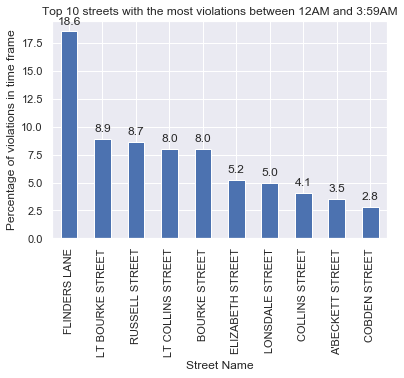

In [41]:
mask = (mostInfring['Arrival Time'].dt.hour >= 0) & (mostInfring['Arrival Time'].dt.hour <= 3)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 12AM and 3:59AM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

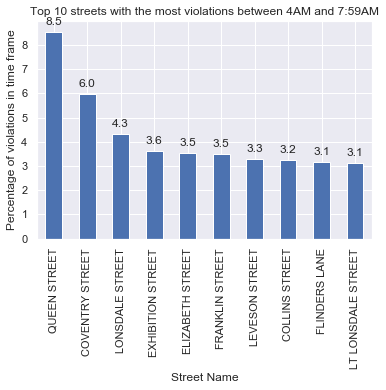

In [42]:
mask = (mostInfring['Arrival Time'].dt.hour >= 4) & (mostInfring['Arrival Time'].dt.hour <= 7)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 4AM and 7:59AM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

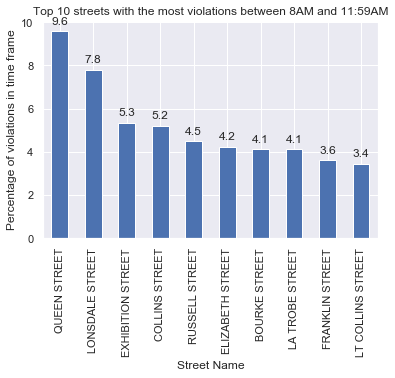

In [43]:
mask = (mostInfring['Arrival Time'].dt.hour >= 8) & (mostInfring['Arrival Time'].dt.hour <= 11)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 8AM and 11:59AM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

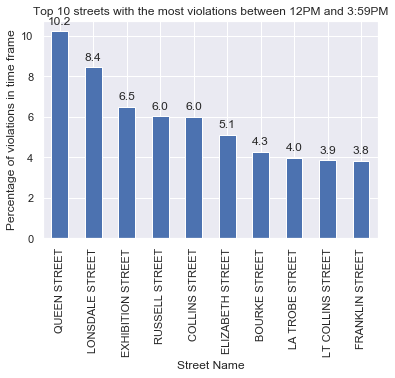

In [44]:
mask = (mostInfring['Arrival Time'].dt.hour >= 12) & (mostInfring['Arrival Time'].dt.hour <= 15)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 12PM and 3:59PM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

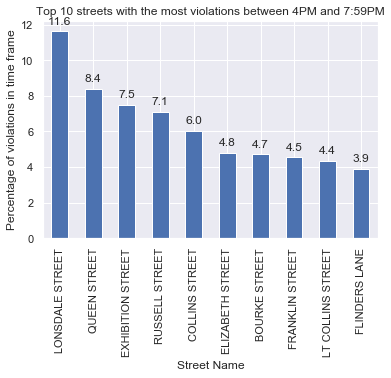

In [45]:
mask = (mostInfring['Arrival Time'].dt.hour >= 16) & (mostInfring['Arrival Time'].dt.hour <= 19)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 4PM and 7:59PM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

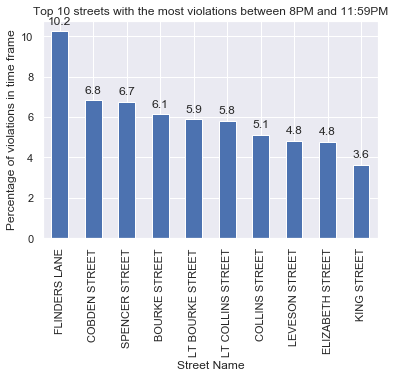

In [46]:
mask = (mostInfring['Arrival Time'].dt.hour >= 20) & (mostInfring['Arrival Time'].dt.hour <= 20)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Street Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 streets with the most violations between 8PM and 11:59PM')
visulization.set_xlabel('Street Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

### Areas with the highest amount (Perecentage) of violiations in a  given time period (every 4 Hours)

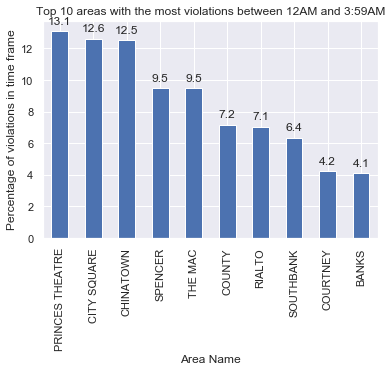

In [47]:
mask = (mostInfring['Arrival Time'].dt.hour >= 0) & (mostInfring['Arrival Time'].dt.hour <= 3)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 12AM and 3:59AM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

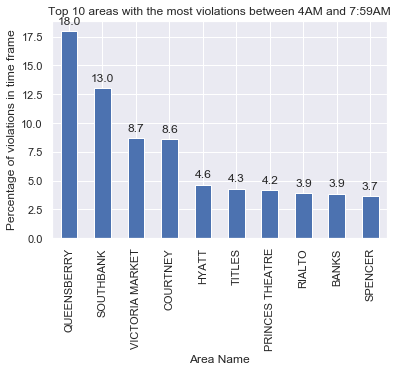

In [48]:
mask = (mostInfring['Arrival Time'].dt.hour >= 4) & (mostInfring['Arrival Time'].dt.hour <= 7)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 4AM and 7:59AM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

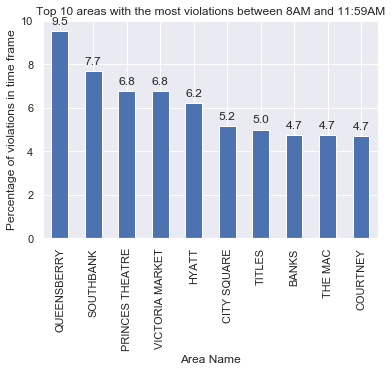

In [49]:
mask = (mostInfring['Arrival Time'].dt.hour >= 8) & (mostInfring['Arrival Time'].dt.hour <= 11)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 8AM and 11:59AM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

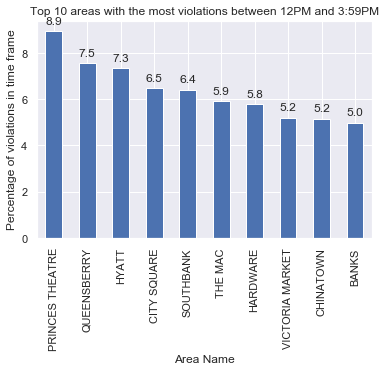

In [50]:
mask = (mostInfring['Arrival Time'].dt.hour >= 12) & (mostInfring['Arrival Time'].dt.hour <= 15)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 12PM and 3:59PM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

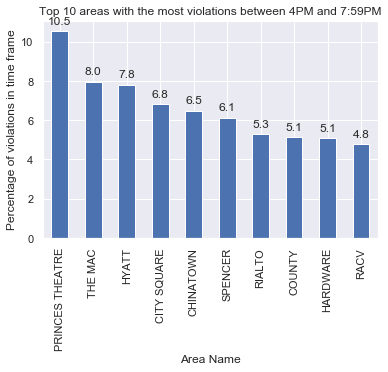

In [51]:
mask = (mostInfring['Arrival Time'].dt.hour >= 16) & (mostInfring['Arrival Time'].dt.hour <= 19)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 4PM and 7:59PM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

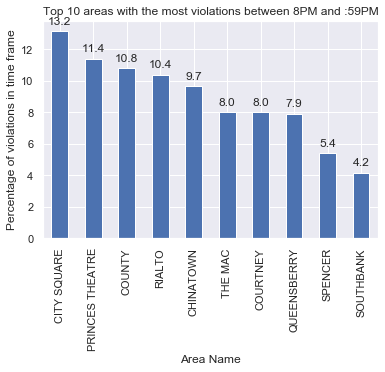

In [52]:
mask = (mostInfring['Arrival Time'].dt.hour >= 20) & (mostInfring['Arrival Time'].dt.hour <= 23)
timeRange = mostInfring.loc[mask]
mostInfringed = timeRange['Area Name'].value_counts(normalize = True)*100
mostInfringedSorted = mostInfringed.sort_values(ascending = False).head(10)

visulization = mostInfringedSorted.T.plot(kind = 'bar')
visulization.set_title('Top 10 areas with the most violations between 8PM and :59PM')
visulization.set_xlabel('Area Name')
visulization.set_ylabel('Percentage of violations in time frame')
add_value_labels(visulization)

## What is the busiest hour for each area

In [53]:
Bhour = parkingdata
Bhour['Arrival Time'] = pd.DatetimeIndex(Bhour['Arrival Time'])
Bhour.set_index(keys='Arrival Time', inplace=True)

In [54]:
start = datetime.time(0,0,0)
end = datetime.time(3,59,59)
Bhour0 = Bhour.between_time(start,end)
Bhour0

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2011-01-10 00:01:10,BANKS,MARKET STREET,FLINDERS LANE,FLINDERS STREET,5,1263W,2011-01-10 00:02:44,94,2P DIS M-SUN 0:00-23:59,0,957,1667
2011-01-10 00:01:11,CHINATOWN,RUSSELL STREET,BOURKE STREET,LT COLLINS STREET,2,742E,2011-01-10 03:58:20,14229,4P DIS AOT 12:00-7:30,0,1221,525
2011-01-10 00:01:11,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,2011-01-10 11:00:19,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
2011-01-10 00:01:13,PRINCES THEATRE,EXHIBITION STREET,LT BOURKE STREET,BOURKE STREET,2,452E,2011-01-10 00:37:42,2189,2P DIS M-SUN 0:00-23:59,0,647,201
2011-01-10 00:01:14,PRINCES THEATRE,EXHIBITION STREET,BOURKE STREET,LT COLLINS STREET,5,429W,2011-01-10 05:28:10,19616,TKT AREA M-SUN 0:00 - 7:30,0,647,176
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30 03:47:43,CITY SQUARE,COLLINS STREET,SWANSTON STREET,RUSSELL STREET,3,1950N,2012-09-30 04:11:25,1422,P/(NO PARKING) M-SUN 0:00 - 23:59,1,528,5361
2012-09-30 03:49:41,SPENCER,FLINDERS LANE,SPENCER STREET,KING STREET,3,1864N,2012-09-30 06:11:31,8510,2P DIS M-SUN 0:00-23:59,1,669,7834
2012-09-30 03:52:03,CHINATOWN,LT COLLINS STREET,ELIZABETH STREET,SWANSTON STREET,4,2197S,2012-09-30 03:55:18,195,2P DIS M-SUN 0:00-23:59,0,911,5063


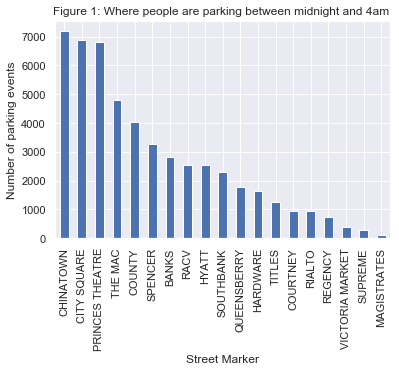

In [55]:
bplot = Bhour0['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 1: Where people are parking between midnight and 4am ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()

In [56]:
start = datetime.time(4,0,0)
end = datetime.time(7,59,59)
Bhour1 = Bhour.between_time(start,end)
Bhour1

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2011-01-10 04:02:31,PRINCES THEATRE,LT BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2531S,2011-01-10 05:54:46,6735,1P AOT M-SAT 0:00-7:30,1,907,1294
2011-01-10 04:02:34,CITY SQUARE,RUSSELL STREET,COLLINS STREET,FLINDERS LANE,1,C650,2011-01-10 04:07:07,273,S/ NO STOP AOT 0:00-7:30,1,1221,479
2011-01-10 04:02:47,THE MAC,A'BECKETT STREET,ELIZABETH STREET,SWANSTON STREET,4,5981S,2011-01-10 04:12:54,607,P10 M-SUN 0:00-23:59,0,5,2440
2011-01-10 04:03:16,COUNTY,SPENCER STREET,LT BOURKE STREET,BOURKE STREET,5,1537W,2011-01-10 04:05:47,151,P15 DIS M-SUN 0:00-23:59,0,1285,872
2011-01-10 04:05:23,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,4,2841S,2011-01-10 04:08:57,214,2P DIS AOT 0:00-23:59,0,894,1826
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30 07:59:19,PRINCES THEATRE,BOURKE STREET,EXHIBITION STREET,SPRING STREET,3,2342N,2012-09-30 09:02:27,3788,1P SUN 7:30-18:30,0,123,7706
2012-09-30 07:59:38,REGENCY,SPRING STREET,LT LONSDALE STREET,LONSDALE STREET,5,D9W,2012-09-30 08:19:44,1206,2P DIS M-SUN 0:00-23:59,0,1288,6073
2012-09-30 07:59:39,PRINCES THEATRE,BOURKE STREET,EXHIBITION STREET,SPRING STREET,3,2336N,2012-09-30 08:51:23,3104,1P SUN 7:30-18:30,0,123,1561


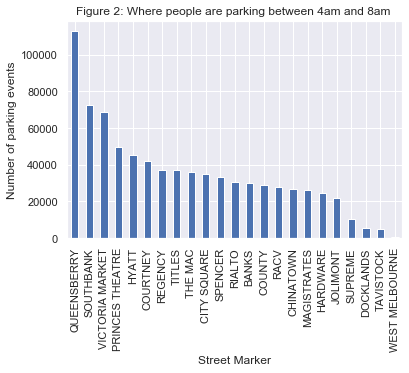

In [57]:
bplot = Bhour1['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 2: Where people are parking between 4am and 8am ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()

In [58]:
start = datetime.time(8,0,0)
end = datetime.time(11,59,59)
Bhour2 = Bhour.between_time(start,end)
Bhour2

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2011-01-10 08:00:04,THE MAC,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,3,3768N,2011-01-10 08:01:15,71,1/2P TKT A SAT 7:30-19:30,0,856,1512
2011-01-10 08:00:06,BANKS,QUEEN STREET,FLINDERS STREET,FLINDERS LANE,1,C1046,2011-01-10 08:56:22,3376,1P MTR M-SAT 7:30-19:30,0,1171,629
2011-01-10 08:00:07,TITLES,QUEEN STREET,LA TROBE STREET,LT LONSDALE STREET,1,C1260,2011-01-10 08:16:45,998,1P MTR M-SAT 7:30-19:30,0,1171,734
2011-01-10 08:00:08,VICTORIA MARKET,FRANKLIN STREET,WILLIAM STREET,QUEEN STREET,1,C6946,2011-01-10 08:02:10,122,2P MTR M-SAT 7:30-20:30,0,681,2935
2011-01-10 08:00:16,SPENCER,SPENCER STREET,BOURKE STREET,LT COLLINS STREET,2,1526E,2011-01-10 08:17:40,1044,2P MTR SAT 7:30-20:30,0,1285,768
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30 11:59:52,THE MAC,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,4,3755S,2012-09-30 15:45:02,13510,1P SUN 7:30-18:30,1,856,6138
2012-09-30 11:59:53,VICTORIA MARKET,FRANKLIN STREET,WILLAM STREET,QUEEN STREET,1,C6932,2012-09-30 13:32:07,5534,2P SUN 7:30-18:30,0,681,6897
2012-09-30 11:59:56,HYATT,LT COLLINS STREET,EXHIBITION STREET,SPRING STREET,4,2153S,2012-09-30 12:43:54,2638,1P SUN 7:30-18:30,0,911,5005


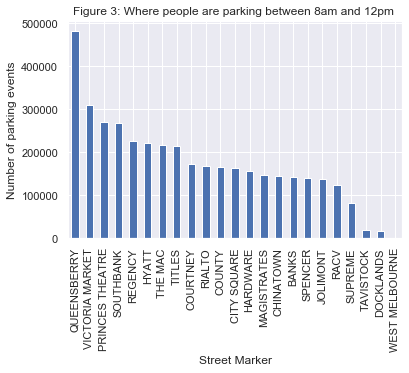

In [59]:
bplot = Bhour2['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 3: Where people are parking between 8am and 12pm ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()

In [60]:
start = datetime.time(12,0,0)
end = datetime.time(15,59,59)
Bhour3 = Bhour.between_time(start,end)
Bhour3

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2011-01-10 12:00:00,HYATT,FLINDERS LANE,EXHIBITION STREET,SPRING STREET,3,1734N,2011-01-10 12:01:09,69,1P MTR M-SAT 7:30-19:30,0,669,1412
2011-01-10 12:00:01,SUPREME,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,3,3000N,2011-01-10 12:01:03,62,1P MTR SAT 7:30-19:30,0,894,1764
2011-01-10 12:00:06,TITLES,LA TROBE STREET,QUEEN STREET,ELIZABETH STREET,4,3815S,2011-01-10 12:14:12,846,1P TKT A SAT 7:30-19:30,0,856,2151
2011-01-10 12:00:07,SPENCER,COLLINS STREET,SPENCER STREET,KING STREET,4,2073S,2011-01-10 12:01:37,90,P (PARKING) DIS M-SAT 7:30-19.30,0,528,1317
2011-01-10 12:00:11,HYATT,COLLINS STREET,EXHIBITION STREET,SPRING STREET,3,1892N,2011-01-10 12:01:36,85,1P MTR M-SAT 7:30-19:30,0,528,1082
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30 15:59:51,COURTNEY,O'CONNELL STREET,COBDEN STREET,VICTORIA STREET,2,5028E,2012-09-30 16:16:54,1023,2P S-S 7:30-18:30,0,1062,3790
2012-09-30 15:59:52,HYATT,EXHIBITION STREET,COLLINS STREET,FLINDERS LANE,5,291W,2012-09-30 16:10:46,654,1P SUN 7:30-18:30,0,647,7681
2012-09-30 15:59:56,TITLES,QUEEN STREET,LA TROBE STREET,LT LONSDALE STREET,1,C1256,2012-09-30 16:33:55,2039,1P SUN 7:30-18:30,0,1171,729


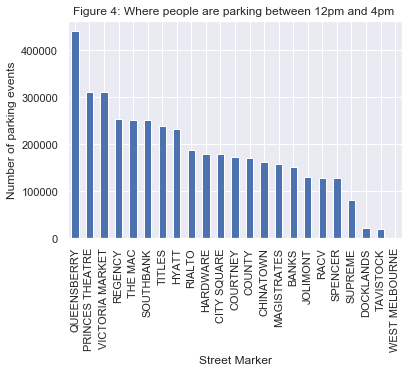

In [61]:
bplot = Bhour3['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 4: Where people are parking between 12pm and 4pm ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()

In [62]:
start = datetime.time(16,0,0)
end = datetime.time(19,59,59)
Bhour4 = Bhour.between_time(start,end)
Bhour4

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2011-01-10 16:00:00,VICTORIA MARKET,QUEEN STREET,VICTORIA STREET,THERRY STREET,5,4999W,2011-01-10 16:00:01,1,PERMIT ZONE AUTH VEH SAT 16:00-23:59,0,1171,2949
2011-01-10 16:00:00,VICTORIA MARKET,QUEEN STREET,VICTORIA STREET,THERRY STREET,5,5009W,2011-01-10 16:00:01,1,PERMIT ZONE AUTH VEH SAT 16:00-23:59,0,1171,3034
2011-01-10 16:00:00,VICTORIA MARKET,QUEEN STREET,VICTORIA STREET,THERRY STREET,2,4964E,2011-01-10 16:00:01,1,PERMIT ZONE AUTH VEH SAT 16:00-23:59,0,1171,3116
2011-01-10 16:00:02,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,4,6667S,2011-01-10 16:32:14,1932,P10 M-SAT 7:30-19:30,1,681,2904
2011-01-10 16:00:04,CITY SQUARE,FLINDERS LANE,SWANSTON STREET,RUSSELL STREET,4,1765S,2011-01-10 16:02:03,119,P10 M-SUN 0:00-23:59,0,669,1432
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30 19:51:33,PRINCES THEATRE,LT BOURKE STREET,RUSSELL STREET,EXHIBITION STREET,4,2531S,2012-09-30 21:25:04,5611,1P AOT SUN 0:00-23:59,1,907,7173
2012-09-30 19:54:01,BANKS,WILLIAM STREET,FLINDERS LANE,FLINDERS STREET,5,1287W,2012-09-30 19:59:32,331,2P DIS AOT 0:00-23:59,0,1428,7289
2012-09-30 19:54:55,THE MAC,LA TROBE STREET,SWANSTON STREET,RUSSELL STREET,4,3733S,2012-09-30 19:56:46,111,2P DIS AOT 00:00-23:59,0,856,5716


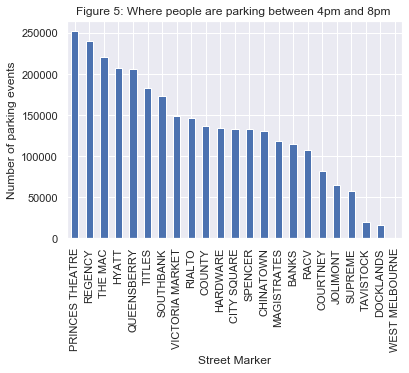

In [63]:
bplot = Bhour4['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 5: Where people are parking between 4pm and 8pm ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()

In [64]:
start = datetime.time(20,0,0)
end = datetime.time(23,59,59)
Bhour5 = Bhour.between_time(start,end)
Bhour5

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
Arrival Time,,,,,,,,,,,,
2011-01-10 20:00:12,RIALTO,CHURCH STREET,BOURKE STREET,LT COLLINS STREET,5,2259W,2011-01-10 20:16:11,959,P MTR M-SAT 19:30-20:30,0,200,1691
2011-01-10 20:00:16,REGENCY,EXHIBITION STREET,LA TROBE STREET,LT LONSDALE STREET,2,618E,2011-01-10 20:30:00,1784,2P MTR SAT 7:30-20:30,0,647,186
2011-01-10 20:00:26,RIALTO,KING STREET,BOURKE STREET,LT COLLINS STREET,2,1452E,2011-01-10 20:01:32,66,S/ NO STOP AOT BUSES 0:00-23:59,1,839,886
2011-01-10 20:00:33,THE MAC,FRANKLIN STREET,SWANSTON STREET,VICTORIA STREET,1,C6450,2011-01-10 20:30:00,1767,2P MTR M-SAT 7:30-20:30,0,681,2815
2011-01-10 20:00:37,TITLES,LA TROBE STREET,QUEEN STREET,ELIZABETH STREET,4,3793S,2011-01-10 20:04:33,236,P TKT A M-SAT 19:30-20:30,0,856,2190
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30 23:47:56,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-09-30 23:57:52,596,2P DIS M-SUN 0:00-23:59,0,1221,7815
2012-09-30 23:48:34,CHINATOWN,RUSSELL STREET,BOURKE STREET,LT COLLINS STREET,5,765W,2012-09-30 23:50:02,88,2P DIS M-SUN 0:00-23:59,0,1221,689
2012-09-30 23:48:41,CITY SQUARE,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1777S,2012-09-30 23:51:57,196,2P DIS M-SUN 0:00-23:59,0,669,6758


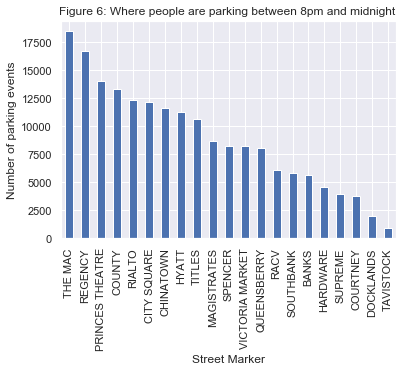

In [65]:
bplot = Bhour5['Area Name'].value_counts()
bplot.plot(kind = 'bar')
plt.title('Figure 6: Where people are parking between 8pm and midnight ')
plt.xlabel('Street Marker')
plt.ylabel('Number of parking events')
plt.show()